**Here we try to build a model to:**

1) Identify the song and artist from its characteristics(musical)

2) Identify whether song is by male or female group

3) Analyse characteristics of song to determine its popularity

In [ ]:
import sys
import os
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import csv
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import model_from_json
import joblib

os.environ['SPOTIPY_CLIENT_ID'] = 'SPOTIPY_CLIENT_ID'
os.environ['SPOTIPY_CLIENT_SECRET'] = 'SPOTIPY_CLIENT_SECRET'

client_credentials_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
artists = ["BTS", "Stray Kids", "EXO", "Monsta X", "NCT 127", "SEVENTEEN", "BLACKPINK", "GOT7", "ATEEZ", "NCT Dream", "TWICE",
            "SHINee", "LOONA", "DAY6", "Mamamoo", "iKON", "The Boyz", "ITZY", "Dreamcatcher", "VIXX", "Sunmi", "Super Junior",
            "SuperM", "X1", "Chung Ha", "Tomorrow x Together",  "GFriend", "HyunA", "Girls' Generation", "B.A.P", "BIGBANG",
            "EXID", "IU", "A.C.E", "WINNER", "IZ ONE", "f(x)", "Wanna One", "Everglow", "OneUs", "Cosmic Girls", 
            "NU EST", "TVXQ", "(G)I-DLE", "Momoland", "BtoB", "2NE1", "INFINITE", "OH MY GIRL", "S.E.S.", "Baby Vox", 
            "Girl’s Day", "I.O.I", "Apink", "Miss A", "Brown Eyed Girls", "Wonder Girls", "Sistar", "Lovelyz", "CLC", "AOA",
            "HELLOVENUS", "TAEYEON", "Ailee", "HEIZE", "Jeong Eun Ji", "Fromis_9", "Weki Meki", "Bolbbalgan4", "Gugudan"]

guys = ["BTS", "Stray Kids", "EXO", "Monsta X", "NCT 127", "SEVENTEEN", "GOT7", "ATEEZ", "NCT Dream", "SHINee", "DAY6", 
        "iKON", "The Boyz", "VIXX", "Super Junior", "SuperM", "X1", "Tomorrow x Together", "B.A.P", "BIGBANG", "A.C.E", 
        "WINNER", "Wanna One", "OneUs", "NU EST", "TVXQ", "BtoB", "INFINITE"]

girls = ['BLACKPINK', 'TWICE', 'LOONA', 'Mamamoo', 'ITZY', 'Dreamcatcher', 'Sunmi', 'Chung Ha', 'GFriend', 'HyunA',
         "Girls' Generation", 'EXID', 'IU', 'IZ ONE', 'f(x)', 'Everglow', 'Cosmic Girls', '(G)I-DLE', 'Momoland',
         '2NE1', 'OH MY GIRL', "S.E.S.", "Baby Vox", "Girl’s Day", "I.O.I", "Apink", "Miss A", "Brown Eyed Girls", 
         "Wonder Girls", "Sistar", "Lovelyz", "CLC", "AOA", "HELLOVENUS", "TAEYEON", "Ailee", "HEIZE", "Jeong Eun Ji",
         "Fromis_9", "Weki Meki", "Bolbbalgan4", "Gugudan"]
#from Fromis_9

path_to_artist_info = "/usr/local/lib/python3.7/dist-packages/spotipy/artist_info/"

In [ ]:
pip install spotipy

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 138 kB 10.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
path_to_artist_info = '/content/drive/MyDrive/spotify-neural-network-master/'

In [ ]:
name = []
duration = []
key = []
mode = []
time_sig = []
acousticness = []
danceability = []
energy = []
instrumentalness = []
liveness = []
loudness = []
speechiness = []
valence = []
tempo = []
gender = []
group = []
popularity = []

for artist in artists:
    if artist in guys:
        group_gender = 'M'
    else:
        group_gender = 'F'
    with open(path_to_artist_info + 'all_artist' + ".csv", newline='', encoding='utf-8-sig') as csvfile:
        has_header = csv.Sniffer().has_header(csvfile.readline())
        csvfile.seek(0)  # Rewind.
        reader = csv.reader(csvfile)
        if has_header:
            next(reader)
        for row in reader:
            if float(row[3]) < 300000:
                    name.append(row[0])
                    group.append(artist)
                    gender.append(group_gender)
                    duration.append(float(row[3]))
                    key.append(float(row[4]))
                    mode.append(float(row[5]))
                    time_sig.append(float(row[6]))
                    acousticness.append(float(row[7]))
                    danceability.append(float(row[8]))
                    energy.append(float(row[9]))
                    instrumentalness.append(float(row[10]))
                    liveness.append(float(row[11]))
                    loudness.append(float(row[12]))
                    speechiness.append(float(row[13]))
                    valence.append(float(row[14]))
                    tempo.append(float(row[15]))
                    popularity.append(float(row[16]))

In [ ]:
with open("all_artist.csv", 'w', newline='', encoding='utf-8-sig') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Name of Song', 'Group', 'Gender', 'Duration (MS)', 'Key', 'Mode', 'Time Signature', 'Acousticness', 'Danceability', 
                        'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Valence', 'Tempo', 'Popularity'])
        
    for i in range(len(name)):
        writer.writerow([name[i], group[i], gender[i], duration[i], key[i], mode[i], time_sig[i], acousticness[i], 
                         danceability[i], energy[i], instrumentalness[i], liveness[i], loudness[i], speechiness[i], valence[i], 
                         tempo[i], popularity[i]])

In [ ]:
def get_data_by_gender():
    audio_features = np.empty((0,13))
    gender = np.empty((0,1))
    with open("/content/drive/MyDrive/spotify-neural-network-master/all_artist.csv", newline='', encoding='utf-8-sig') as csvfile:
        has_header = csv.Sniffer().has_header(csvfile.readline())
        csvfile.seek(0)  # Rewind.
        reader = csv.reader(csvfile)
        if has_header:
            next(reader)
        for row in reader:
            gender = np.append(gender, row[2])
            audio_features = np.append(audio_features, [[float(row[3]), float(row[4]), float(row[5]), float(row[6]), float(row[7]), float(row[8]), 
                                   float(row[9]), float(row[10]), float(row[11]), float(row[12]), float(row[13]), 
                                   float(row[14]), float(row[15])]], axis=0)
    return audio_features, gender

def get_data_by_popularity():
    audio_features = np.empty((0,13))
    pop = np.empty((0,1))
    with open("/content/drive/MyDrive/spotify-neural-network-master/all_artist.csv", newline='', encoding='utf-8-sig') as csvfile:
        has_header = csv.Sniffer().has_header(csvfile.readline())
        csvfile.seek(0)  # Rewind.
        reader = csv.reader(csvfile)
        if has_header:
            next(reader)
        for row in reader:
            #print(row[1])
            pop = np.append(pop, row[16])
            audio_features = np.append(audio_features, [[float(row[3]), float(row[4]), float(row[5]), float(row[6]), float(row[7]), float(row[8]), 
                                   float(row[9]), float(row[10]), float(row[11]), float(row[12]), float(row[13]), 
                                   float(row[14]), float(row[15])]], axis=0)
    return audio_features, pop

In [ ]:
from keras import optimizers
from keras.metrics import categorical_accuracy
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

x1, y1 = get_data_by_gender()
encoder = LabelEncoder()
encoder.fit(y1)
encoded_y1 = encoder.transform(y1)
x2, y2 = get_data_by_popularity()

In [ ]:
#gender
# baseline model
def create_baseline_gender():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
model = KerasClassifier(build_fn=create_baseline_gender, epochs=200, batch_size=5, verbose=1)
estimators.append(('mlp', model))
pipeline = Pipeline(estimators)
#kfold = StratifiedKFold(n_splits=10, shuffle=True)
#results = cross_val_score(pipeline, x1, encoded_y1, cv=kfold)
#print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
#BASELINE

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
#now fit training data
fitted = pipeline.fit(x1, encoded_y1)
filename = 'finalized_model_gender.sav'
joblib.dump(pipeline, filename)
predicted = pipeline.predict(x1)

Epoch 1/200
1741/1741 [==============================] - 4s 2ms/step - loss: 0.6346 - accuracy: 0.6339
Epoch 2/200
1741/1741 [==============================] - 3s 2ms/step - loss: 0.6056 - accuracy: 0.6657
Epoch 3/200
1741/1741 [==============================] - 3s 2ms/step - loss: 0.5925 - accuracy: 0.6734
Epoch 4/200
1741/1741 [==============================] - 3s 2ms/step - loss: 0.5854 - accuracy: 0.6809
Epoch 5/200
1741/1741 [==============================] - 3s 2ms/step - loss: 0.5791 - accuracy: 0.6823
Epoch 6/200
1741/1741 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.6854
Epoch 7/200
1741/1741 [==============================] - 3s 2ms/step - loss: 0.5716 - accuracy: 0.6933
Epoch 8/200
1741/1741 [==============================] - 3s 2ms/step - loss: 0.5685 - accuracy: 0.6949
Epoch 9/200
1741/1741 [==============================] - 3s 2ms/step - loss: 0.5658 - accuracy: 0.6970
Epoch 10/200
1741/1741 [==============================] - 3s 2ms/step - l

In [ ]:
for i in range(27):
    print(pipeline.predict([[i,i,i,i,i,i,i,i,i,i,i,i,i]]))

[[0]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]


In [ ]:
import csv
from sklearn import preprocessing
def get_data():
    excel_file = []
    with open("/content/drive/MyDrive/spotify-neural-network-master/all_artist.csv", newline='', encoding='utf-8-sig') as csvfile:
        has_header = csv.Sniffer().has_header(csvfile.readline())
        csvfile.seek(0)  # Rewind.
        reader = csv.reader(csvfile)
        if has_header:
            next(reader)
        for row in reader:
            excel_file.append([row[0], row[1], float(row[3]), float(row[4]), float(row[5]), float(row[6]), float(row[7]), float(row[8]), 
                                   float(row[9]), float(row[10]), float(row[11]), float(row[12]), float(row[13]), 
                                   float(row[14]), float(row[15])])
    return excel_file

def sounds_closest_to(f):
    durationMM = [5000, 299880.0]
    keyMM = [0, 11]
    modeMM = [0, 1]
    time_sigMM = [0, 5]
    acousticnessMM = [0, 0.995]
    danceabilityMM = [0.0, 0.954]
    energyMM = [0.0116, 0.999]
    instrumentalnessMM = [0.0, 0.989]
    livenessMM = [0.0, 0.987]
    loudnessMM = [-29.375, -0.005]
    speechinessMM = [0.0, 0.955]
    valenceMM = [0.0, 0.978]
    tempoMM = [0.0, 248.052]
    mm = [durationMM, keyMM, modeMM, time_sigMM, acousticnessMM, danceabilityMM, energyMM, instrumentalnessMM, livenessMM,
          loudnessMM, speechinessMM, valenceMM, tempoMM]
    artists = get_data()
    least_squares = []
    for artist in artists:
        ls = 0
        for i in range(len(f)):
            ls += (normalize(f[i], mm[i]) - normalize(artist[i+2], mm[i]))**2
        least_squares.append(ls)
    indexOfMin = least_squares.index(min(least_squares))
    return artists[indexOfMin][0]

def normalize(x, mm):
    z = (x-mm[0])/(mm[1] - mm[0])
    return z

In [ ]:
sounds_closest_to([306187,10,0,4,0.00467,0.771,0.894,0,0.349,-4.981,0.0367,0.584,120.003])

"DON'T STOP THE MUSIC - 2012 NEW EVOLUTION in Japan ver."

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def create_baseline_regression():

    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

#estimators = []
#estimators.append(('standardize', StandardScaler()))
#estimators.append(('mlp', KerasRegressor(build_fn=create_baseline_regression, epochs=50, batch_size=5, verbose=1)))
#pipeline = Pipeline(estimators)
#pipeline.fit(x2, y2)

In [ ]:
pipeline.predict(x1)

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

artists = ["BTS", "Stray Kids", "EXO", "Monsta X", "NCT 127", "SEVENTEEN", "BLACKPINK", "GOT7", "ATEEZ", "NCT Dream", "TWICE",
            "SHINee", "LOONA", "DAY6", "Mamamoo", "iKON", "The Boyz", "ITZY", "Dreamcatcher", "VIXX", "Sunmi", "Super Junior",
            "SuperM", "X1", "Chung Ha", "Tomorrow x Together",  "GFriend", "HyunA", "Girls' Generation", "B.A.P", "BIGBANG",
            "EXID", "IU", "A.C.E", "WINNER", "IZ ONE", "f(x)", "Wanna One", "Everglow", "OneUs", "Cosmic Girls", 
            "NU EST", "TVXQ", "(G)I-DLE", "Momoland", "BtoB", "2NE1", "INFINITE", "OH MY GIRL", "S.E.S.", "Baby Vox", 
            "Girl’s Day", "I.O.I", "Apink", "Miss A", "Brown Eyed Girls", "Wonder Girls", "Sistar", "Lovelyz", "CLC", "AOA",
            "HELLOVENUS", "TAEYEON", "Ailee", "HEIZE", "Jeong Eun Ji", "Fromis_9", "Weki Meki", "Bolbbalgan4", "Gugudan"]

guys = ["BTS", "Stray Kids", "EXO", "Monsta X", "NCT 127", "SEVENTEEN", "GOT7", "ATEEZ", "NCT Dream", "SHINee", "DAY6", 
        "iKON", "The Boyz", "VIXX", "Super Junior", "SuperM", "X1", "Tomorrow x Together", "B.A.P", "BIGBANG", "A.C.E", 
        "WINNER", "Wanna One", "OneUs", "NU EST", "TVXQ", "BtoB", "INFINITE"]

girls = ['BLACKPINK', 'TWICE', 'LOONA', 'Mamamoo', 'ITZY', 'Dreamcatcher', 'Sunmi', 'Chung Ha', 'GFriend', 'HyunA',
         "Girls' Generation", 'EXID', 'IU', 'IZ ONE', 'f(x)', 'Everglow', 'Cosmic Girls', '(G)I-DLE', 'Momoland',
         '2NE1', 'OH MY GIRL', "S.E.S.", "Baby Vox", "Girl’s Day", "I.O.I", "Apink", "Miss A", "Brown Eyed Girls", 
         "Wonder Girls", "Sistar", "Lovelyz", "CLC", "AOA", "HELLOVENUS", "TAEYEON", "Ailee", "HEIZE", "Jeong Eun Ji",
         "Fromis_9", "Weki Meki", "Bolbbalgan4", "Gugudan"]

name = []
duration = []
key = []
mode = []
time_sig = []
acousticness = []
danceability = []
energy = []
instrumentalness = []
liveness = []
loudness = []
speechiness = []
valence = []
tempo = []
gender = []
group = []
popularity = []

def compile_all_artists():
    for artist in artists:
        if artist in guys:
            group_gender = 'M'
        else:
            group_gender = 'F'
            with open(path_to_artist_info + 'all_artist' + ".csv", newline='', encoding='utf-8-sig') as csvfile:
              has_header = csv.Sniffer().has_header(csvfile.readline())
              csvfile.seek(0)  # Rewind.
              reader = csv.reader(csvfile)
              if has_header:
                next(reader)
                for row in reader:
                  if float(row[3]) < 300000:
                    name.append(row[0])
                    group.append(artist)
                    gender.append(group_gender)
                    duration.append(float(row[3]))
                    key.append(float(row[4]))
                    mode.append(float(row[5]))
                    time_sig.append(float(row[6]))
                    acousticness.append(float(row[7]))
                    danceability.append(float(row[8]))
                    energy.append(float(row[9]))
                    instrumentalness.append(float(row[10]))
                    liveness.append(float(row[11]))
                    loudness.append(float(row[12]))
                    speechiness.append(float(row[13]))
                    valence.append(float(row[14]))
                    tempo.append(float(row[15]))
                    popularity.append(float(row[16]))

In [ ]:
compile_all_artists()

0.017 0.0


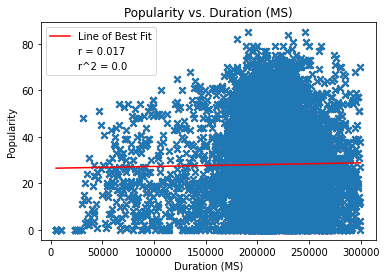

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = 'Popularity'

x = duration
y = popularity

r = round(np.corrcoef(x, y)[0][1], 3)
r2 = round(np.corrcoef(x, y)[0][1]**2, 3)
print(r, r2)

plt.scatter(x,y, marker='x')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="red", label="Line of Best Fit")

plt.title(p + ' vs. Duration (MS)')
plt.xlabel('Duration (MS)')
plt.ylabel(p)

plt.plot([], [], ' ', label="r = " + str(r))
plt.plot([], [], ' ', label="r^2 = " + str(r2))
plt.legend()

plt.show()

0.016 0.0


/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


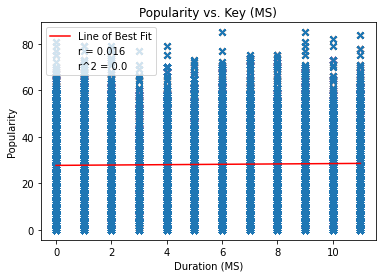

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = 'Popularity'

x = key
y = popularity

r = round(np.corrcoef(x, y)[0][1], 3)
r2 = round(np.corrcoef(x, y)[0][1]**2, 3)
print(r, r2)

plt.scatter(x,y, marker='x')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="red", label="Line of Best Fit")

plt.title(p + ' vs. Key (MS)')
plt.xlabel('Duration (MS)')
plt.ylabel(p)

plt.plot([], [], ' ', label="r = " + str(r))
plt.plot([], [], ' ', label="r^2 = " + str(r2))
plt.legend()

plt.show()

0.029 0.001


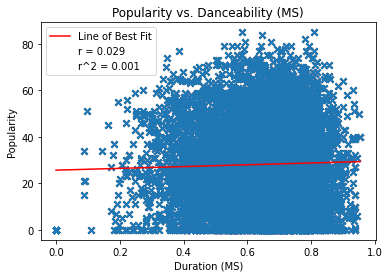

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = 'Popularity'

x = danceability
y = popularity

r = round(np.corrcoef(x, y)[0][1], 3)
r2 = round(np.corrcoef(x, y)[0][1]**2, 3)
print(r, r2)

plt.scatter(x,y, marker='x')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="red", label="Line of Best Fit")

plt.title(p + ' vs. Danceability (MS)')
plt.xlabel('Duration (MS)')
plt.ylabel(p)

plt.plot([], [], ' ', label="r = " + str(r))
plt.plot([], [], ' ', label="r^2 = " + str(r2))
plt.legend()

plt.show()

Text(0.5, 1.0, 'Popularity')

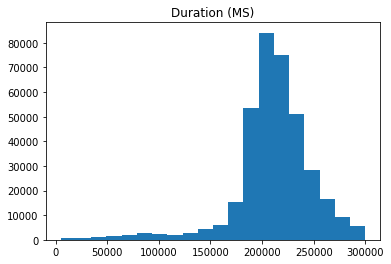

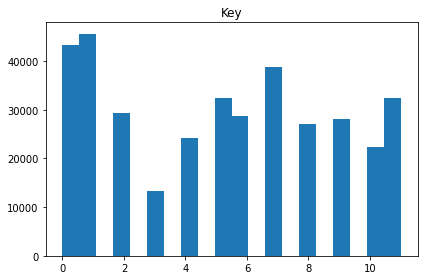

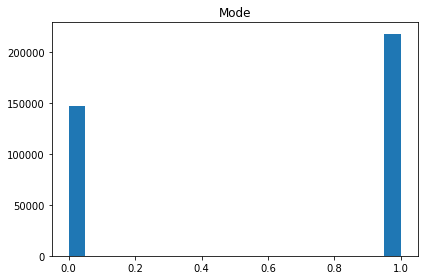

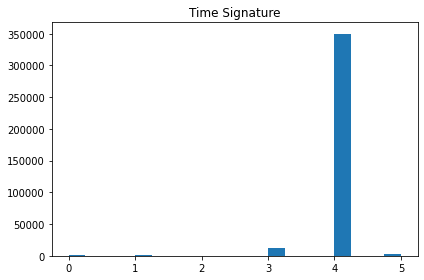

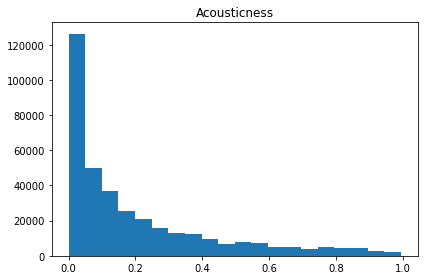

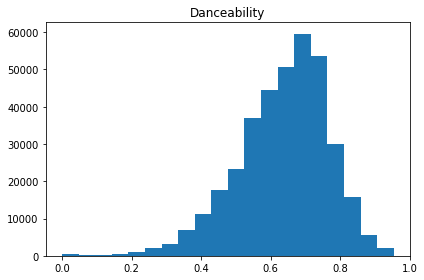

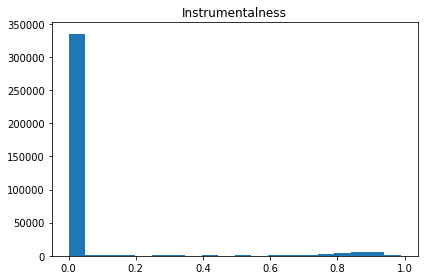

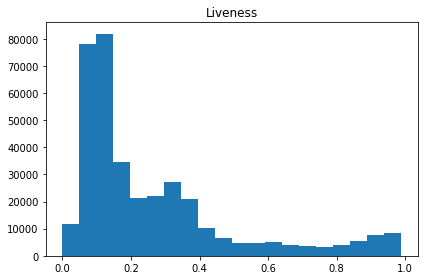

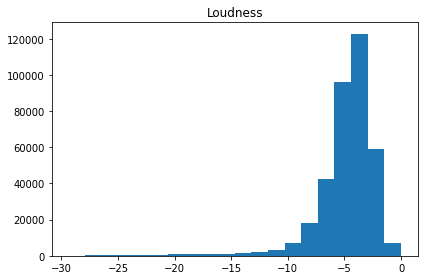

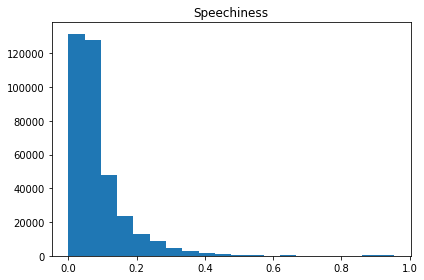

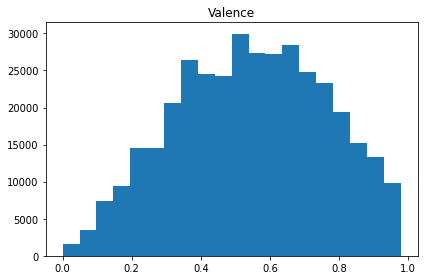

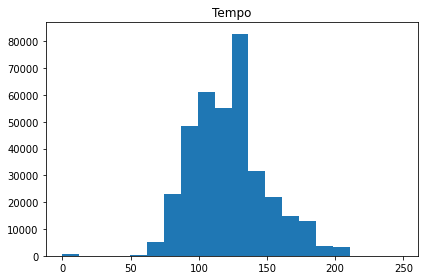

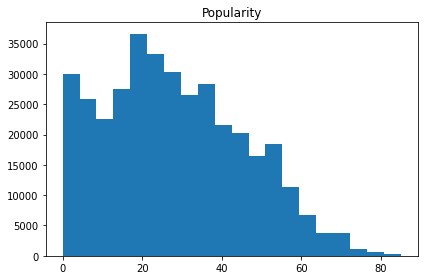

In [ ]:
n_bins = 20
fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=False)
axs.hist(duration, bins=n_bins)
axs.set_title("Duration (MS)")

fig2, axs2 = plt.subplots(1, 1, sharey=False, tight_layout=True)
axs2.hist(key, bins=n_bins)
axs2.set_title("Key")

fig3, axs3 = plt.subplots(1, 1, sharey=False, tight_layout=True)
axs3.hist(mode, bins=n_bins)
axs3.set_title("Mode")

fig4, axs4 = plt.subplots(1, 1, sharey=False, tight_layout=True)
axs4.hist(time_sig, bins=n_bins)
axs4.set_title("Time Signature")

fig5, axs5 = plt.subplots(1, 1, sharey=False, tight_layout=True)
axs5.hist(acousticness, bins=n_bins)
axs5.set_title("Acousticness")

fig6, axs6 = plt.subplots(1, 1, sharey=False, tight_layout=True)
axs6.hist(danceability, bins=n_bins)
axs6.set_title("Danceability")

fig7, axs7 = plt.subplots(1, 1, sharey=False, tight_layout=True)
axs7.hist(instrumentalness, bins=n_bins)
axs7.set_title("Instrumentalness")

fig8, axs8 = plt.subplots(1, 1, sharey=False, tight_layout=True)
axs8.hist(liveness, bins=n_bins)
axs8.set_title("Liveness")

fig9, axs9 = plt.subplots(1, 1, sharey=False, tight_layout=True)
axs9.hist(loudness, bins=n_bins)
axs9.set_title("Loudness")

fig10, axs10 = plt.subplots(1, 1, sharey=False, tight_layout=True)
axs10.hist(speechiness, bins=n_bins)
axs10.set_title("Speechiness")

fig11, axs11 = plt.subplots(1, 1, sharey=False, tight_layout=True)
axs11.hist(valence, bins=n_bins)
axs11.set_title("Valence")

fig12, axs12 = plt.subplots(1, 1, sharey=False, tight_layout=True)
axs12.hist(tempo, bins=n_bins)
axs12.set_title("Tempo")

fig13, axs13 = plt.subplots(1, 1, sharey=False, tight_layout=True)
axs13.hist(popularity, bins=n_bins)
axs13.set_title("Popularity")
